In [1]:
import pandas
from Corpus import Corpus
from Classes import Documents

In [2]:
df_discours =pandas.read_csv('discours_US.csv', sep ="\t")
corp = Corpus('TD8')
for index, row in df_discours.iterrows():
    phrases =row['text'].split(".")
    for k in phrases:
        if k != "":
            corp.add(Documents(row["descr"],row['speaker'],row['date'],row['link'],k))
corp.concorde('work',20)

,Contexte gauche,Motif trouvé,Contexte droit
0,it took to make it,work,But I think it's f
1,re than the typical,work,er There's somethin
2,wrong when American,work,ers keep getting mor
3,is piecing together,work,"and loans, knowing"
4,believed you had to,work,hard to make your w
...,...,...,...
2106,rump and offered to,work,with him on behalf
2107,ome we wanted or we,work,ed so hard for and I
2108,making our economy,work,for everyone not ju
2109,stand together and,work,together with respe


In [3]:
import Search_Engine as s
engine = s.SearchEngine(corp)

In [4]:
engine.search("Jobs, president, money",100000)

Recherche des documents: 100%|██████████| 32305/32305 [00:00<00:00, 2081846.67it/s]


,Document,Score
0,21951,22.260612
1,11446,20.002601
2,1149,19.611866
3,23441,18.663827
4,2030,18.087482
...,...,...
32300,18170,0.000000
32301,18172,0.000000
32302,18173,0.000000
32303,18176,0.000000


In [5]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(
    description='click to confirm the data',
    layout={'width': '300px'}
)
l =widgets.Label("Moteur de recherche")
t =widgets.Text()
i =widgets.IntSlider(50)
out = widgets.Output()

In [6]:
def clique_bouton(event):
    query = t.value
    num = i.value
    with out:
        out.clear_output()
        # Call the search function
        print(engine.search(query, num))

button.on_click(clique_bouton)
display(widgets.VBox([l,t,i,button,out]))

In [15]:
import pickle
with open("../corpus_ai.pkl", "rb") as f:
    corpus = pickle.load(f)
ai_engine = s.SearchEngine(corpus)
print(ai_engine.construire_matrice_tf())

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 5676 stored elements and shape (94, 2378)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (93, 4)	1
  (93, 17)	1
  (93, 31)	1
  (93, 61)	1
  (93, 94)	1
  (93, 130)	1
  (93, 164)	1
  (93, 286)	1
  (93, 392)	1
  (93, 877)	1
  (93, 888)	1
  (93, 1674)	1
  (93, 2046)	1
  (93, 2060)	1
  (93, 2067)	1
  (93, 2105)	1
  (93, 2369)	1
  (93, 2370)	1
  (93, 2371)	1
  (93, 2372)	1
  (93, 2373)	1
  (93, 2374)	1
  (93, 2375)	1
  (93, 2376)	1
  (93, 2377)	1


{0: 1, 4: 1, 5: 1, 7: 1, 10: 2, 11: 1, 12: 1, 15: 1, 19: 1, 20: 1, 21: 1, 26: 1, 28: 1, 29: 1, 36: 1, 39: 1, 42: 1, 55: 1}


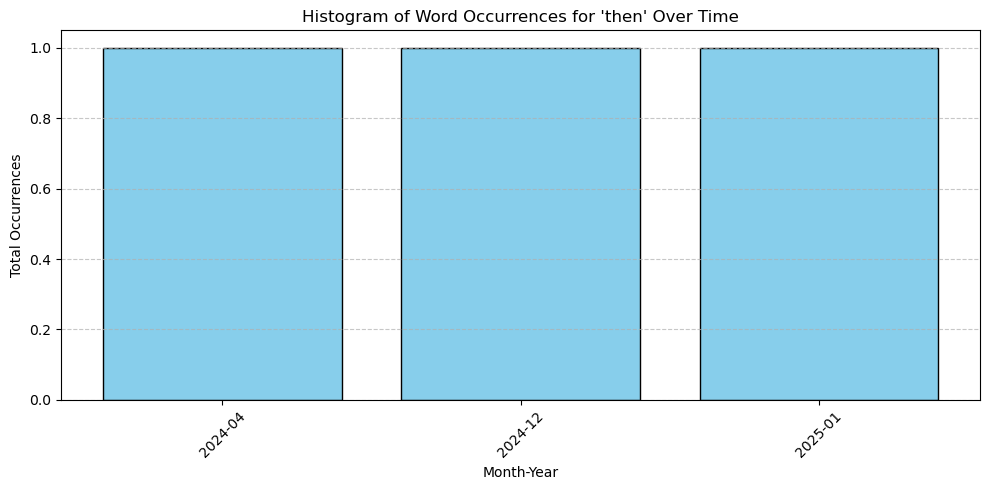

{0: 1, 4: 1, 5: 1, 7: 1, 10: 2, 11: 1, 12: 1, 15: 1, 19: 1, 20: 1, 21: 1, 26: 1, 28: 1, 29: 1, 36: 1, 39: 1, 42: 1, 55: 1}


In [12]:
print(ai_engine.timeline("then"))